In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Layer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model


In [ ]:
!pip install kaggle

In [ ]:
kagle_cred = json.load(open('kaggle.json'))

In [ ]:
os.environ['KAGGLE_USERNAME'] = kagle_cred['username']
os.environ['KAGGLE_KEY'] = kagle_cred['key']

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset --unzip


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 97% 1.98G/2.04G [00:35<00:04, 14.1MB/s]
100% 2.04G/2.04G [00:35<00:00, 61.3MB/s]


In [ ]:
print(os.listdir('plantvillage dataset'))

['color', 'segmented', 'grayscale']


In [ ]:
# Dataset path
BASE_DIR = "/content/plantvillage dataset/color"

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [ ]:
# Image data Generator
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # Use 20% for validation
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    BASE_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation generator
validation_generator = data_gen.flow_from_directory(
    BASE_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [ ]:
model = Sequential([
    # Layer 1
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    # Layer 2
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Layer 3
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Flatten
    Flatten(),

    # Dense
    Dense(128, activation='relu'),
    Dropout(0.3),

    # Output layer
    Dense(train_generator.num_classes, activation='softmax')



])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,173,862 (42.62 MB)

 Trainable params: 11,173,862 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // BATCH_SIZE
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 108s 73ms/step - accuracy: 0.4311 - loss: 2.1591 - val_accuracy: 0.8018 - val_loss: 0.6568
Epoch 2/50
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 95s 70ms/step - accuracy: 0.7571 - loss: 0.7772 - val_accuracy: 0.8574 - val_loss: 0.4481
Epoch 3/50
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 95s 70ms/step - accuracy: 0.8290 - loss: 0.5331 - val_accuracy: 0.8807 - val_loss: 0.3807
Epoch 4/50
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 97s 71ms/step - accuracy: 0.8702 - loss: 0.4006 - val_accuracy: 0.8843 - val_loss: 0.3831
Epoch 5/50
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 93s 68ms/step - accuracy: 0.8955 - loss: 0.3227 - val_accuracy: 0.9063 - val_loss: 0.2999
Epoch 6/50
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 96s 71ms/step - accuracy: 0.9169 - loss: 0.2542 - val_accuracy: 0.9057 - val_loss: 0.3049
Epoch 7/50
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 94s 69ms/step - accuracy: 0.9264 - loss: 0.2203 - val_accuracy: 0.9095 - val_loss: 0.3227
Epoch 8/50
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 96s 70ms/step - accuracy: 0.9386 - loss: 0.1

## Model Evulation

In [ ]:
val_loss , val_acc = model.evaluate(validation_generator,steps=validation_generator.samples // BATCH_SIZE)
print(val_acc)

339/339 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.9003 - loss: 0.8701
0.9071718454360962


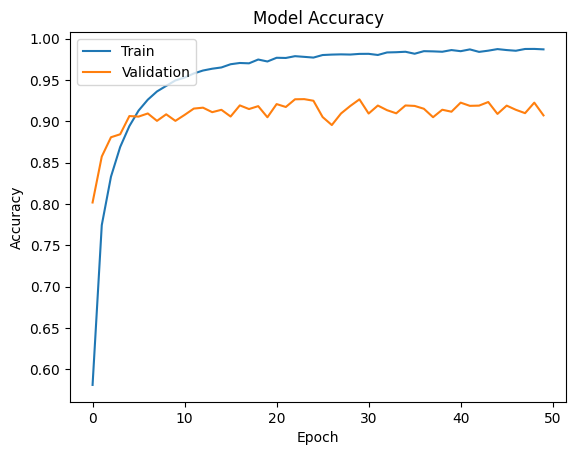

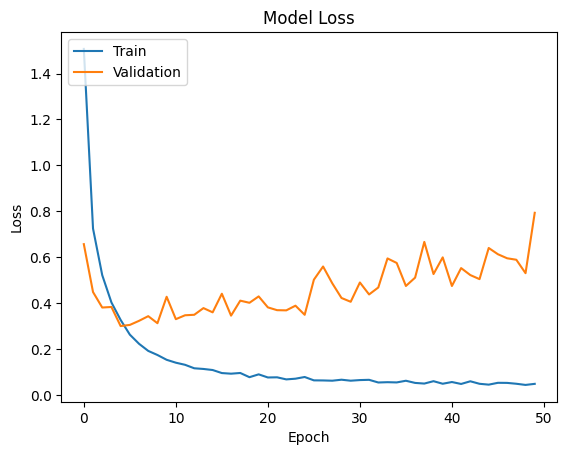

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
def load_and_process(image_path,target_size=(224,224)):
  img = Image.open(image_path)
  img = img.resize(target_size)
  img_array = np.array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = img_array.astype('float32') / 255.0
  return img_array

In [ ]:
def predict_image(model,image_path,class_indices):
  preprocessed_image = load_and_process(image_path)
  prediction = model.predict(preprocessed_image)
  preducted_class_index = np.argmax(prediction,axis=1)[0]
  predicted_class_name = class_indices[preducted_class_index]
  return predicted_class_name

In [ ]:
# Create a mapping for class indices
class_indices = {v:k for k,v in train_generator.class_indices.items()}
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
json.dump(class_indices,open('class_indices.json','w'))

In [ ]:
image_path = '/content/p.jpg'
predicted_class = predict_image(model,image_path,class_indices)
print(predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step
Pepper,_bell___healthy


In [ ]:
# Save model
model.save("plant_model.h5")
from google.colab import files
files.download("plant_model.h5")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>